Cleaned Delhi data loaded successfully.

--- EDA: Analyzing AQI Over Time ---


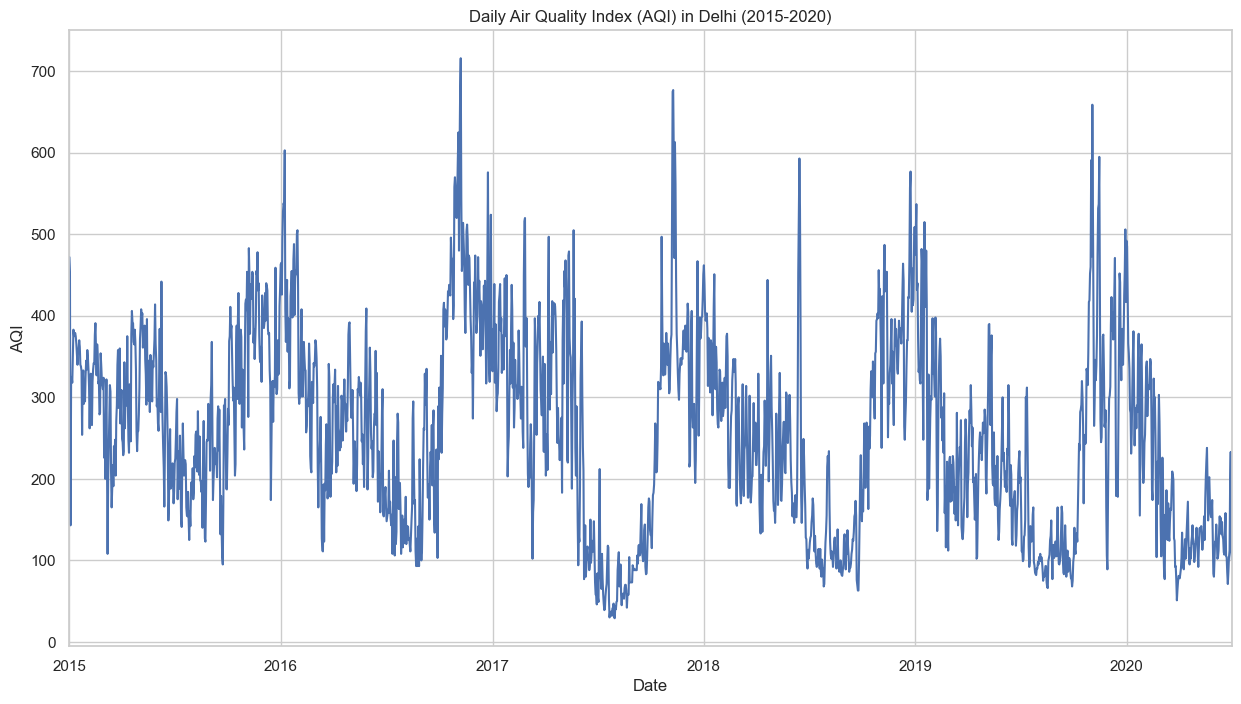

In [1]:
#Importing Libraries and Loading Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Setting plotting style and figure size
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (15, 8)

# Creating a directory to save our figures for the report
if not os.path.exists('../reports/figures'):
    os.makedirs('../reports/figures')

# Loading the cleaned data
try:
    delhi_df = pd.read_csv('../data/processed/delhi_aqi_cleaned.csv', index_col='Date', parse_dates=True)
    print("Cleaned Delhi data loaded successfully.")
except FileNotFoundError:
    print("Error: delhi_aqi_cleaned.csv not found. Please run the previous notebook first.")

# Time Series Analysis of AQI
print("\n--- EDA: Analyzing AQI Over Time ---")

# Ploting the daily AQI
delhi_df['AQI'].plot(title='Daily Air Quality Index (AQI) in Delhi (2015-2020)')
plt.ylabel('AQI')
plt.savefig('../reports/figures/daily_aqi_timeseries.png')
plt.show()


--- EDA: Analyzing Seasonal Trends ---


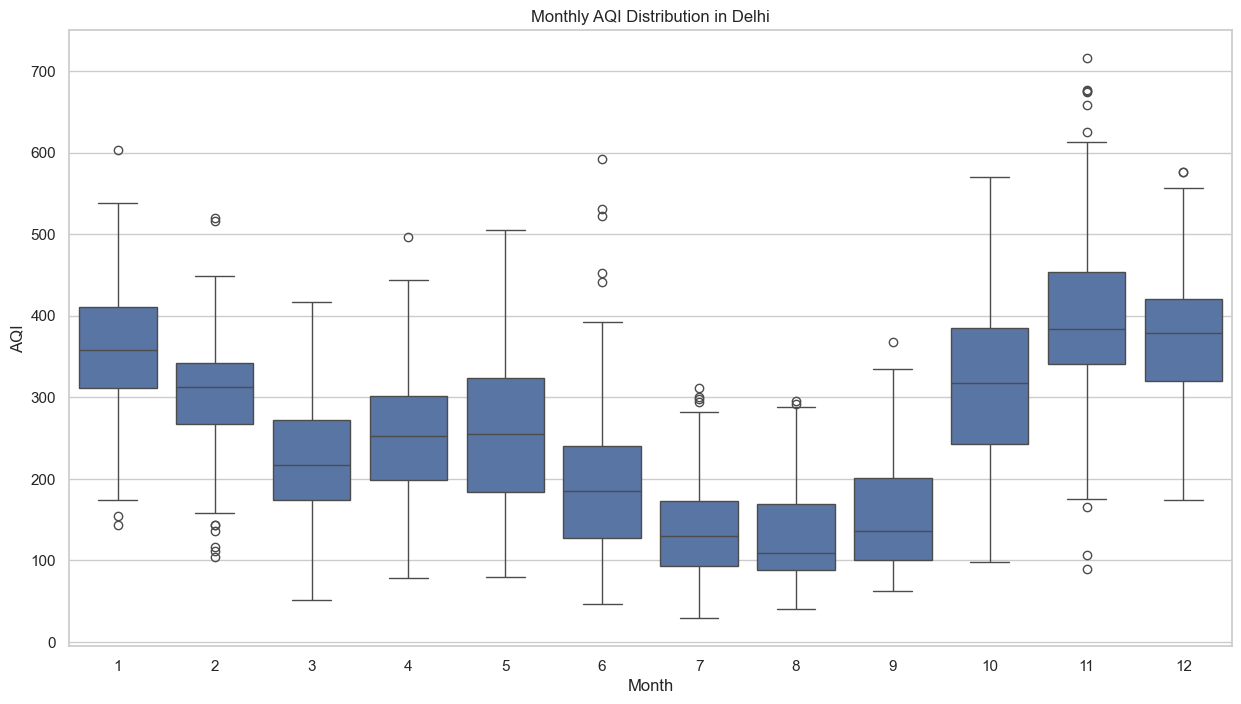

In [2]:
# Seasonal Analysis - Monthly and Yearly Trends
print("\n--- EDA: Analyzing Seasonal Trends ---")

# Creating new time-based features
delhi_df['Year'] = delhi_df.index.year
delhi_df['Month'] = delhi_df.index.month

# Boxploting of AQI by Month
fig, ax = plt.subplots()
sns.boxplot(data=delhi_df, x='Month', y='AQI', ax=ax)
ax.set_title('Monthly AQI Distribution in Delhi')
ax.set_xlabel('Month')
ax.set_ylabel('AQI')
plt.savefig('../reports/figures/monthly_aqi_boxplot.png')
plt.show()

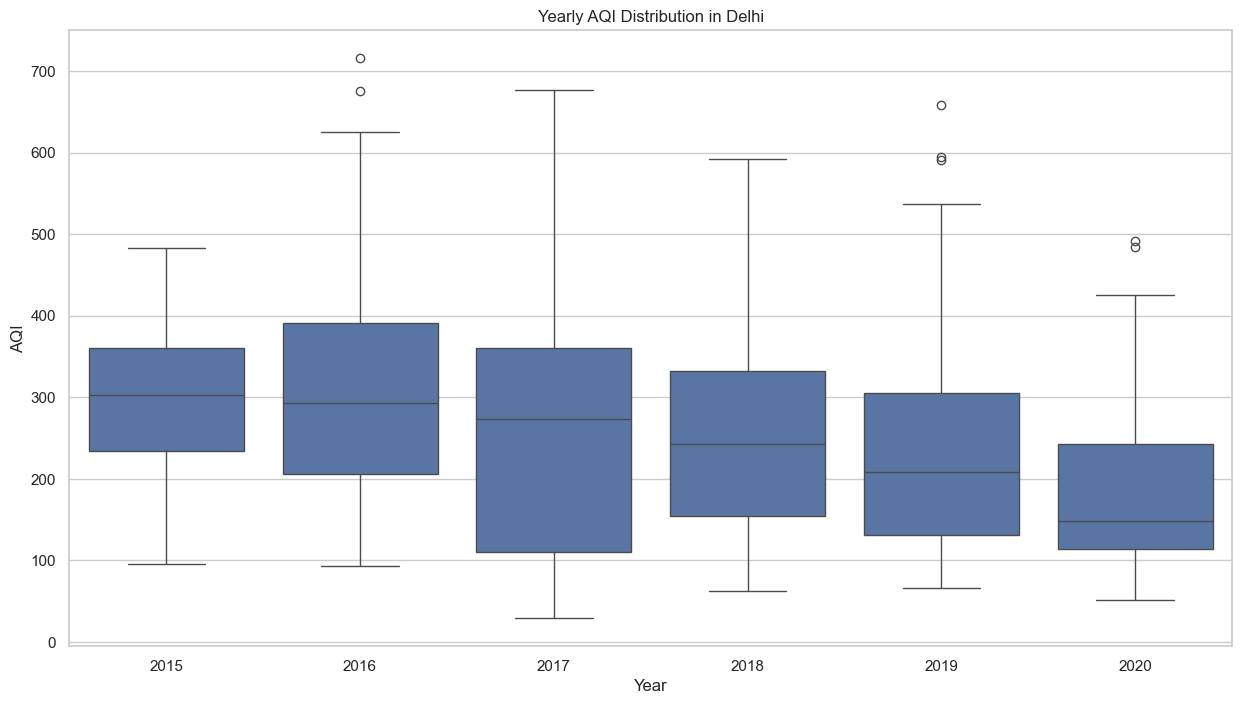

In [3]:
# Boxplot of AQI by Year
fig, ax = plt.subplots()
sns.boxplot(data=delhi_df, x='Year', y='AQI', ax=ax)
ax.set_title('Yearly AQI Distribution in Delhi')
ax.set_xlabel('Year')
ax.set_ylabel('AQI')
plt.savefig('../reports/figures/yearly_aqi_boxplot.png')
plt.show()


--- EDA: Correlation Between Pollutants and AQI ---


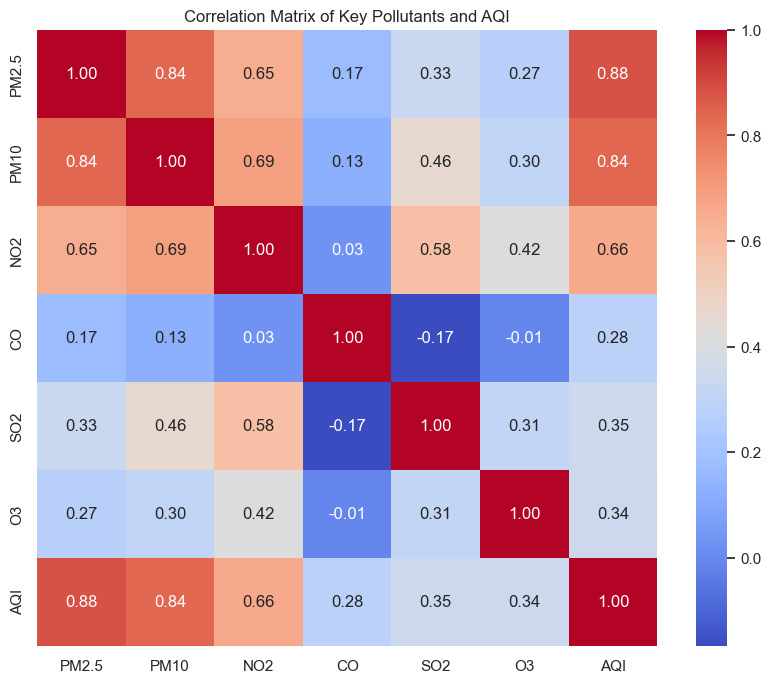

In [4]:
# Correlation Analysis
print("\n--- EDA: Correlation Between Pollutants and AQI ---")

# The AQI is a composite index calculated from individual pollutants.
# Let's see how strongly each pollutant correlates with the final AQI value.
pollutants_and_aqi = ['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3', 'AQI']
correlation_matrix = delhi_df[pollutants_and_aqi].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Key Pollutants and AQI')
plt.savefig('../reports/figures/correlation_heatmap.png')
plt.show()


--- EDA: Distribution of AQI Categories ---


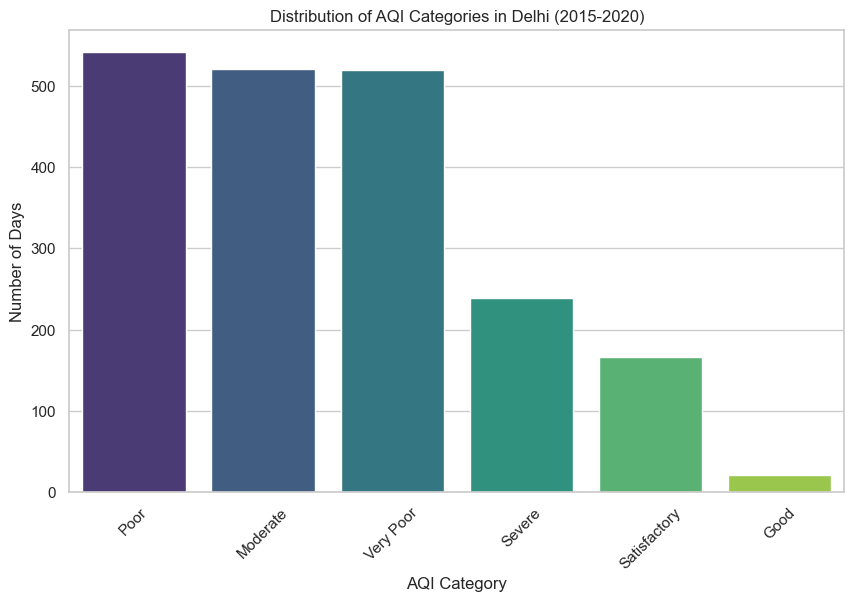

In [5]:
# Distribution of AQI Buckets
print("\n--- EDA: Distribution of AQI Categories ---")
# The 'AQI_Bucket' column gives us a categorical view. Let's analyze its distribution.
aqi_bucket_counts = delhi_df['AQI_Bucket'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=aqi_bucket_counts.index, y=aqi_bucket_counts.values, hue=aqi_bucket_counts.index, palette='viridis', legend=False)
plt.title('Distribution of AQI Categories in Delhi (2015-2020)')
plt.xlabel('AQI Category')
plt.ylabel('Number of Days')
plt.xticks(rotation=45)
plt.savefig('../reports/figures/aqi_bucket_distribution.png')
plt.show()

In [6]:
# Saving the Enhanced Dataset
# Saving the dataframe with the new 'Year' and 'Month' features.
enhanced_path = '../data/processed/delhi_aqi_enhanced.csv'
delhi_df.to_csv(enhanced_path)
print(f"\nEnhanced Delhi data with time features saved to {enhanced_path}")


Enhanced Delhi data with time features saved to ../data/processed/delhi_aqi_enhanced.csv
